# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [1]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 0.0, E_test is 0.10900000000000003
Average number of iterations is 5.372.


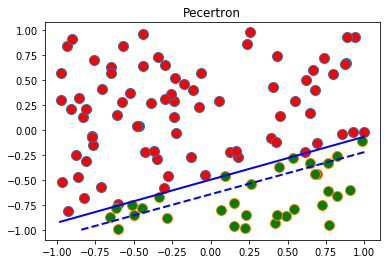

In [21]:
from perceptron import perceptron

nRep = 1000 # number of replicates
nTrain = 10 # number of training data
nTest = 100
E_train, E_test, avgIter = 0, 0, 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    X_train, y_train = X[:, :nTrain], y[:, :nTrain
                                       ]
    X_test, y_test = X[:, nTrain:], y[:, nTrain:]
    w_g, iters = perceptron(X_train, y_train)
    
    train_results = y_train * np.matmul(w_g.T, np.concatenate((np.ones((1, nTrain)), X_train), axis = 0))
    train_error = np.sum(train_results <= 0) / nTrain
    test_results = y_test * np.matmul(w_g.T, np.concatenate((np.ones((1, nTest)), X_test), axis = 0))
    test_error = np.sum(test_results <= 0) / nTest
    
    E_train += train_error
    E_test += test_error
    avgIter += iters

E_train /= nRep
E_test /= nRep
avgIter /= nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

In [ ]:
nTrain = 100 # number of training data
X, y, w_f = mkdata(nTrain, 'noisy')
w_g, iters = perceptron(X, y)
# print('E_train is {}, E_test is {}'.format(E_train, E_test))
# print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron Non-linearly separable')


### Part3: Linear Regression

E_train is 0.03980000000000001, E_test is 0.049620000000000025


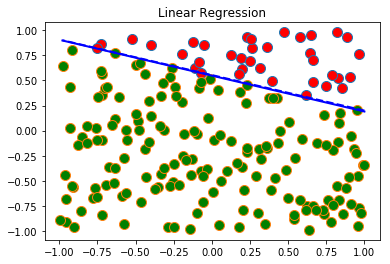

In [22]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data
nTest = 100
E_train, E_test = 0, 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    X_train, y_train = X[:, :nTrain], y[:, :nTrain]
    X_test, y_test = X[:, nTrain:], y[:, nTrain:]
    w_g= linear_regression(X_train, y_train)
    
    train_results = y_train * np.matmul(w_g.T, np.concatenate((np.ones((1, nTrain)), X_train), axis = 0))
    train_error = np.sum(train_results <= 0) / nTrain
    test_results = y_test * np.matmul(w_g.T, np.concatenate((np.ones((1, nTest)), X_test), axis = 0))
    test_error = np.sum(test_results <= 0) / nTest
    
    E_train += train_error
    E_test += test_error

E_train /= nRep
E_test /= nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression');


## Part4: Linear Regression: noisy

E_train is 0.1328700000000001, E_test is 0.14680000000000024


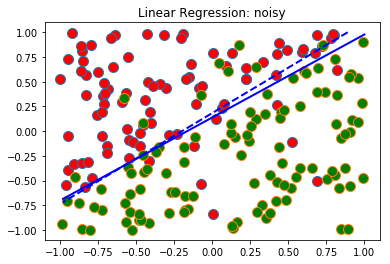

In [29]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data
nTest = 100
E_train, E_test = 0, 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest, 'noisy')
    X_train, y_train = X[:, :nTrain], y[:, :nTrain]
    X_test, y_test = X[:, nTrain:], y[:, nTrain:]
    w_g= linear_regression(X_train, y_train)
    
    train_results = y_train * np.matmul(w_g.T, np.concatenate((np.ones((1, nTrain)), X_train), axis = 0))
    train_error = np.sum(train_results <= 0) / nTrain
    test_results = y_test * np.matmul(w_g.T, np.concatenate((np.ones((1, nTest)), X_test), axis = 0))
    test_error = np.sum(test_results <= 0) / nTest
    
    E_train += train_error
    E_test += test_error

E_train /= nRep
E_test /= nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression: noisy');

## Part5: Linear Regression: poly_fit

In [74]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X_train, y_train = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X_train, y_train)

# Compute training, testing error
nTrain, nTest = X_train.shape[1], X_test.shape[1]
train_results = y_train * np.matmul(w.T, np.concatenate((np.ones((1, nTrain)), X_train), axis = 0))
E_train = np.sum(train_results <= 0) / nTrain
test_results = y_test * np.matmul(w.T, np.concatenate((np.ones((1, nTest)), X_test), axis = 0))
E_test = np.sum(test_results <= 0) / nTest

#print('E_train is {}, E_test is {}'.format(E_train, E_test))
#plotdata(X_test, y_test, w, w, 'Linear Regression without transformation');

# poly_fit with transform
X_train_t = np.array([X_train[0], X_train[1], X_train[0] * X_train[1], X_train[0] ** 2, X_train[1] ** 2])
X_test_t = np.array([X_test[0], X_test[1], X_test[0] * X_test[1], X_test[0] ** 2, X_test[1] ** 2])
w = linear_regression(X_train_t, y)

train_results = y_train * np.matmul(w.T, np.concatenate((np.ones((1, nTrain)), X_train_t), axis = 0))
E_train = np.sum(train_results <= 0) / nTrain
test_results = y_test * np.matmul(w.T, np.concatenate((np.ones((1, nTest)), X_test_t), axis = 0))
E_test = np.sum(test_results <= 0) / nTest

# Compute training, testing error
print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X_test_t, y_test, w, w, 'Linear Regression with transformation');

E_train is 0.48, E_test is 0.5096
Here we only support 2-d X data


## Part6: Logistic Regression

E_train is 0.0023000000000000004, E_test is 0.011800000000000008
Average loss: 1.869007979625014


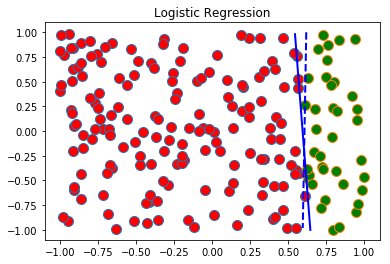

In [159]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 100
E_train, E_test, avgloss = 0, 0, 0

def h(theta, x):
    return 1.0 / (1 + np.exp(np.squeeze(np.matmul(-theta.T, x))))

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    X_train, y_train = X[:, :nTrain], y[:, :nTrain]
    X_test, y_test = X[:, nTrain:], y[:, nTrain:]
    
    w_g, loss = logistic(X_train, y_train)
    # Compute training, testing error
    
    train_results = y_train * (2 * (h(w_g, np.concatenate((np.ones((1, nTrain)), X_train), axis = 0)) - 0.5))
    train_error = np.sum(train_results <= 0) / nTrain
    test_results = y_test * (2 * (h(w_g, np.concatenate((np.ones((1, nTest)), X_test), axis = 0)) - 0.5))
    test_error = np.sum(test_results <= 0) / nTest
    
    avgloss += loss
    E_train += train_error
    E_test += test_error

avgloss /= nRep
E_train /= nRep
E_test /= nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average loss:', avgloss)

plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

E_train is 0.2205000000000001, E_test is 0.2206000000000001
Average loss: 93.86708999443677


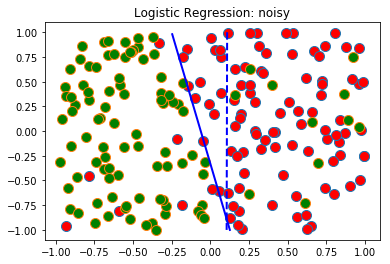

In [173]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 100
E_train, E_test, avgloss = 0, 0, 0

def h(theta, x):
    return 1.0 / (1 + np.exp(np.squeeze(np.matmul(-theta.T, x))))

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest, 'noisy')
    X_train, y_train = X[:, :nTrain], y[:, :nTrain]
    X_test, y_test = X[:, nTrain:], y[:, nTrain:]
    
    w_g, loss = logistic(X_train, y_train)
    # Compute training, testing error
    
    train_results = y_train * (2 * (h(w_g, np.concatenate((np.ones((1, nTrain)), X_train), axis = 0)) - 0.5))
    train_error = np.sum(train_results <= 0) / nTrain
    test_results = y_test * (2 * (h(w_g, np.concatenate((np.ones((1, nTest)), X_test), axis = 0)) - 0.5))
    test_error = np.sum(test_results <= 0) / nTest
    
    avgloss += loss
    E_train += train_error
    E_test += test_error

avgloss /= nRep
E_train /= nRep
E_test /= nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average loss:', avgloss)

plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part8: SVM

E_train is 0.0, E_test is 0.03319999999999998
Average number of support vectors is 2.81.


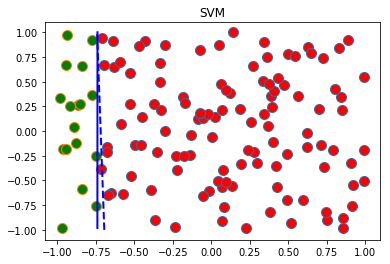

In [258]:
from svm import svm

nRep = 100 # number of replicates
nTrain = 30 # number of training data
nTest = 100
sumw, E_train, E_test = 0, 0, 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    X_train, y_train = X[:, :nTrain], y[:, :nTrain]
    X_test, y_test = X[:, nTrain:], y[:, nTrain:]
    w_g, num_sc = svm(X_train, y_train)
    #print (w_g, num_sc)
    
    train_results = y_train * np.matmul(w_g.T, np.concatenate((np.ones((1, nTrain)), X_train), axis = 0))
    train_error = np.sum(train_results <= 0) / nTrain
    test_results = y_test * np.matmul(w_g.T, np.concatenate((np.ones((1, nTest)), X_test), axis = 0))
    test_error = np.sum(test_results <= 0) / nTest
    
    sumw += num_sc
    E_train += train_error
    E_test += test_error

E_train /= nRep
E_test /= nRep
sumw /= nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(sumw))
plotdata(X, y, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.